# Announcements

1. [Heavy flavour data mining workshop](https://indico.cern.ch/event/433556/) <br />
   Zurich (18-20 February 2016), video streaming is planned

2. [Summer school MLHEP](http://hse.ru/mlhep2015) <br />
   Lund, Sweden (19-26 June 2016)
   
3. Practice at our group

4. [Feedback form](https://docs.google.com/forms/d/15mBZdXdN5uhlFsUAZYKnnrbmrH1Y3BlVt3bvfDT46oI/edit?usp=sharing) about the course

# The second (Higgs) challenge

0. Recap
1. Winners' talks
2. ROC AUC is stable (but not always relevant)
3. NN and GBDT


# Neural networks


1. Reminder about Theano
2. Optimization problems (nonconvex function, diminishing gradients)
3. But today we train deep NNs, this gives good results:

![Example of imagenet](http://blog.kaggle.com/wp-content/uploads/2014/12/imagenet.jpg)

# Face detection example

<img src='http://www.christian-behrenberg.de/img/portfolio/bscthesis/02.jpg' width=600 />

Trying to detect a face is not simple, but we can decompose the problem:
- detect eyes
- detect lips
- detect nose

# Deep learning

<img src='http://i.stack.imgur.com/Hl2H6.png' />

- Idea behind: hierarchical detection of patterns
- First success: unsupervised methods (RBM and autoencoders)


# Convolutional neural networks

<img width=700 src='https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2015/11/convolution.png' />

- convolution works uniformly on the picture
- input of neuron is linear combination, as expected
- 'output' is again a picture - like we applied some filtering
- reduces the amount of parameters 

# Problems 

- Unsupervised learning brings too many complications and may not be helpful to resolve final problem
- How can we train this in supervised manner?
- Up to millions of parameters
- Second-order methods are useless 
- Straightforward approach wins: <br />stochastic gradient descent + adaptive optimization methods
- Huge amount of computations (for images and video) and data

Overfitting problem: use regularizations and dropout.

## Some other problems

<img width=600 src='http://i.imgur.com/bSiNEq6.gif' />

# MNIST example (optional practice)

Classification of handwritten digits into 10 classes.  

<img src='http://andrew.gibiansky.com/blog/machine-learning/k-nearest-neighbors-simplest-machine-learning/images/mnist-example-ipy.png' />

## Installing Keras

In [1]:
#!pip install keras

this may take much time to download - installing bleeding edge version of theano

In [2]:
#!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

## Downloading data

In [3]:
# !cd data && wget http://deeplearning.net/data/mnist/mnist.pkl.gz

In [4]:
# !cd data && gunzip mnist.pkl.gz

In [21]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [7]:
nb_classes = 10 # 10 digits
nb_epoch = 2 # 12 is recommended

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 10 # 32 is better
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [8]:
import cPickle as pickle
with open('data/mnist.pkl') as f:
    (trainX, trainY), (testX, testY), (validX, validY) = pickle.load(f)

In [9]:
# adding one more 'color' axis, as required by keras.
# for new layers this axis is responsible for 'number of patterns' = number of neuron
X_train = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols).astype('float32')
X_test  = testX.reshape(testX.shape[0], 1, img_rows, img_cols).astype('float32')

print X_train.shape[0], 'train samples'
print X_test.shape[0], 'test samples'

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(trainY, nb_classes)
Y_test = np_utils.to_categorical(testY, nb_classes)

50000 train samples
10000 test samples


In [10]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
# Relu is non-linearity
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
# pooling is decreasing size of image with some operation (max in this case)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
# neurons at this layer will 'disappear' with p=0.25
model.add(Dropout(0.25)) 
# flatten all 'images' into single vector
model.add(Flatten())
model.add(Dense(32)) # 128 recommended
model.add(Activation('relu'))
model.add(Dropout(0.5))
# 10 neurons, each correspons to a digit, 
model.add(Dense(nb_classes))
# and softmax to get probabilities
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adadelta')

## What is pooling with 2 x 2 filter
![pooling](http://cdn-ak.f.st-hatena.com/images/fotolife/v/vaaaaaanquish/20150126/20150126055504.png)

## Training
During training Keras will print loss and validation accuracy.
Try to achieve 0.99 accuracy. 

In [ ]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=nb_epoch,
          show_accuracy=True, 
          verbose=1, 
          validation_data=(X_test, Y_test)
         )

In [12]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print 'Test score:', score[0]
print 'Test accuracy:', score[1]

Test score: 0.170992360806
Test accuracy: 0.9537


In [35]:
from keras import backend

def get_layer_output(model, X, layer_id=3):
    compiled_function = backend.function([model.layers[0].input],
                                         [model.layers[layer_id].get_output(train=False)])
    return compiled_function([X])[0]

def display_outputs(layer_output):
    n_samples, n_patterns, _, _ = layer_output.shape
    subplot = 0
    for sample in range(n_samples):
        for pattern in range(n_patterns):
            subplot += 1
            plt.subplot(n_samples, n_patterns, subplot)
            plt.imshow(layer_output[sample, pattern, :, :], cmap='gray')
            plt.axis('off')

layer:  1


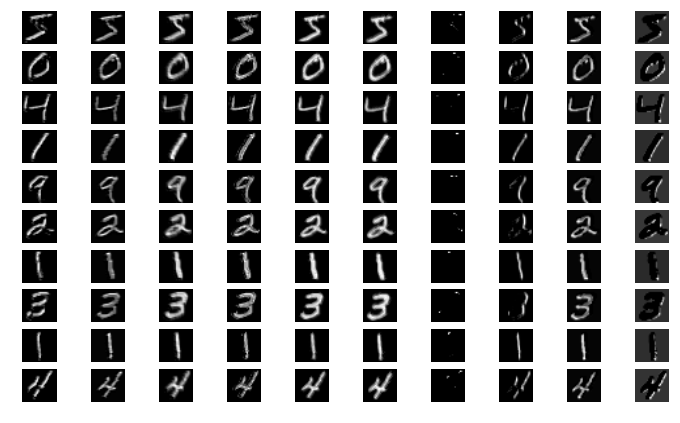

layer:  3


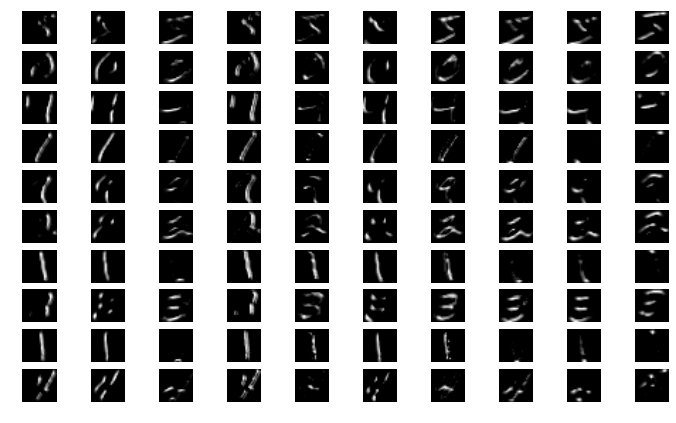

layer:  5


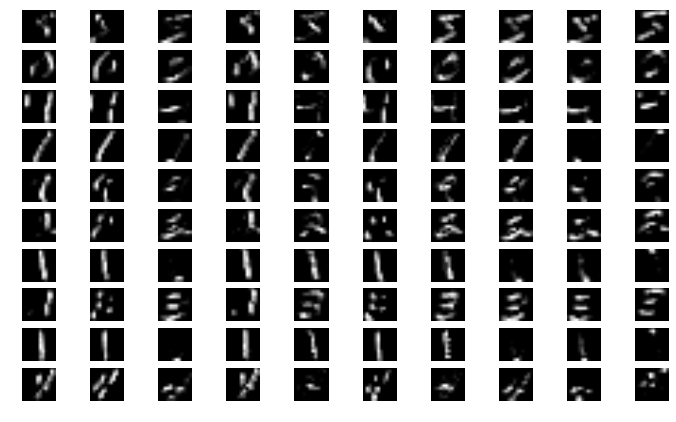

In [41]:
for layer_id in [1, 3, 5]:
    print 'layer: ', layer_id
    plt.figure(figsize=[12, 7])
    layer_output = get_layer_output(model, X_train[:10], layer_id=layer_id)
    display_outputs(layer_output)
    plt.show()

## See also:

1. [Introduction into convolutional neural networks](http://colah.github.io/posts/2014-07-Conv-Nets-Modular/)
2. [Introduction into recurrent neural networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)